## Inteligență Artificială - Laboratorul 1 : Căutări
 - Tudor Berariu
 - Andrei Olaru <cs@andreiolaru.ro>

#### Labirintul

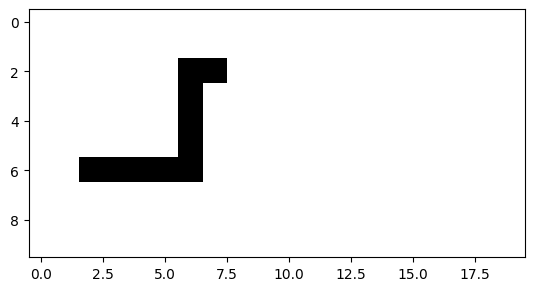

In [3]:
# Vom reprezenta labirintul printr-un tablou bidimensional (o listă de liste)
# celulele libere vor avea valoarea 0, iar pereții valoarea 1

height = 10
width = 20

# Construim labirintul ca o listă de liste
labyrinth = [[0 for c in range(width)] for r in range(height)]

# Așezăm câteva obstacole pe hartă
for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

In [4]:
# Punctul de plecare și punctul destinație vor fi reprezentate prin tupluri
start = (5, 5)
final = (8, 8)

# Funcții lambda, funcționale, lucruri frumoase
is_final = lambda position: position == final

# Map
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

In [5]:
# Filter
list(filter(lambda x: x % 3 == 2, range(20)))  # ==> [2, 5, 8, 11, 14, 17]

[2, 5, 8, 11, 14, 17]

In [6]:
from functools import reduce

# Reduce
reduce(lambda x, y: [y] + x, [], [1,2,3])  # ==> [1, 2, 3]

[1, 2, 3]

### Algoritmul A*

Pentru a implementa algoritmul **A\*** vom scrie întâi o funcție care întoarce lista tuturor pozițiilor vecine unei poziții date.

In [11]:
def is_good(pos):
    (r, c) = pos # Așa se poate desface o poziție în componentele sale
    if r < 0 or c < 0 or r >= height or c >= width:
        return False
    return labyrinth[r][c] != 1

list(map(is_good, [(-1,2), (height,3), (width,4), (5,5), (6,6)])) # False, False, False, True, False

[False, False, False, True, False]

In [48]:
def get_neighbours(pos):
    (r, c) = pos
    neighbs = []
    if r - 1 >= 0 and is_good((r - 1, c)):
        neighbs.append((r - 1, c))
    if c + 1 < width and is_good((r, c + 1)):
        neighbs.append((r, c + 1))
    if r + 1 < height and is_good((r + 1, c)):
        neighbs.append((r + 1, c))
    if c - 1 >= 0 and is_good((r, c - 1)):
        neighbs.append((r, c - 1))
    return neighbs

[get_neighbours(p) for p in [(0,9), (5,5)]] # ==> [[(1,9), (0,8), (0, 10)], [(4,5), (5,4)]] - nu neaparat în ordinea asta

[[(0, 10), (1, 9), (0, 8)], [(4, 5), (5, 4)]]

#### Funcții euristice

Implementați două funcții euristice pe care să le folosiți în algoritmul **A\***:
 - distanța euclidiană
 - distanța Manhattan

In [16]:
from math import sqrt

def euclidean_distance(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return sqrt((x2-x1)**2 + (y2-y1)**2)

euclidean_distance((2,3), (4, 7))   # ==> 4.4721359

4.47213595499958

In [17]:
def manhattan_distance(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return abs(x2-x1) + abs(y2-y1)

manhattan_distance((2,3), (4,0))  # ==> 5

5

#### Cozi de priorități

Pentru coada de priorități necesară algoritmului **A\*** vom folosi heap-ul din Python [[1]](https://docs.python.org/2/library/heapq.html).

In [18]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, (2, 'A'))
heappush(priority_queue, (1, 'B'))
heappush(priority_queue, (1.5, 'C'))

print(heappop(priority_queue))  # ==> (1, 'B')
print(heappop(priority_queue))  # ==> (1.5, 'C')
print(heappop(priority_queue))  # ==> (2, 'A')

(1, 'B')
(1.5, 'C')
(2, 'A')


#### Dicționare

Algoritmul **A\*** memorează în timpul rulării informații despre pozițiile descoperite pe parcurs. Pentru a salva și recupera aceste informații în O(1) vom folosi o tabelă de dispersie, un dicționar în Python.

In [19]:
# Dicționare
d = {}
d['doi'] = 2
d['trei'] = 3

print(d['doi']) # ==> 2

# Funcția get
print(d.get('trei'))  # ==> 3
print(d.get('patru', 'Nu am găsit!'))  # ==> Nu am găsit!

for (key, value) in d.items():
    print(key, " -> ", value)

2
3
Nu am găsit!
doi  ->  2
trei  ->  3


#### Algoritmul A\*

Scrieți o funcție ce implementează algoritmul **A\***. Funcția va primi 3 argumente:
 - poziția de start
 - poziția finală
 - funcția euristică folosită
 
Frontiera va fi o coadă de priorități ce va conține nodurile descoperite:
 - prioritatea va fi dată de funcția f (cost real din nodul de start + valoare estimată până la nodul final)

Pentru informațiile ce trebuie memorate pentru fiecare nod descoperit se va folosi un dicționar

    d[node] = (parent, cost)
    
în care se vor reține părintele nodului și costul cu care a fost descoperit.

In [49]:
def astar(start, end, h):
    # Frontiera, ca listă (heap) de tupluri (cost-total-estimat, nod)
    frontier = []
    heappush(frontier, (0 + h(start, end), start))
    # Nodurile descoperite ca dicționar nod -> (părinte, cost-până-la-nod)
    discovered = {start: (None, 0)}
    while frontier:
        # TODO
        
        (_, best) = heappop(frontier)
        if best == end:
            break
        for neighb in get_neighbours(best):
            (_, cost_best) = discovered[best]
            if neighb not in discovered:
                discovered[neighb] = (best, 1 + cost_best)
                heappush(frontier, (1 + cost_best + h(neighb, end), neighb))
            else:
                (_, cost_neighb) = discovered[neighb]
                if 1 + cost_best < cost_neighb:
                    discovered[neighb] = (best, 1 + cost_best)
                    heappush(frontier, (1 + cost_best + h(neighb, end), neighb))
            
    
    cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
    pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');
    
    path = []
    node = end
    while node != start:
        path.append(node)
        node = discovered[node][0]
    path.append(start)
    path.reverse()
    return path # drumul, ca listă de poziții

[(5, 5),
 (5, 4),
 (5, 3),
 (5, 2),
 (5, 1),
 (6, 1),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (8, 8)]

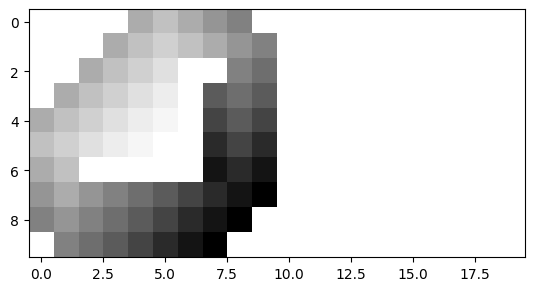

In [50]:
astar(start, final, euclidean_distance)

[(5, 5),
 (4, 5),
 (3, 5),
 (2, 5),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 8),
 (3, 8),
 (4, 8),
 (5, 8),
 (6, 8),
 (7, 8),
 (8, 8)]

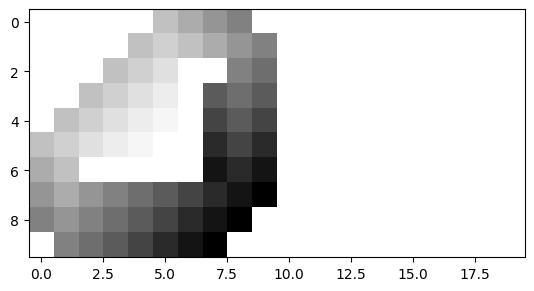

In [51]:
astar(start, final, manhattan_distance)

[(5, 5),
 (4, 5),
 (3, 5),
 (2, 5),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 8),
 (3, 8),
 (4, 8),
 (5, 8),
 (6, 8),
 (7, 8),
 (8, 8)]

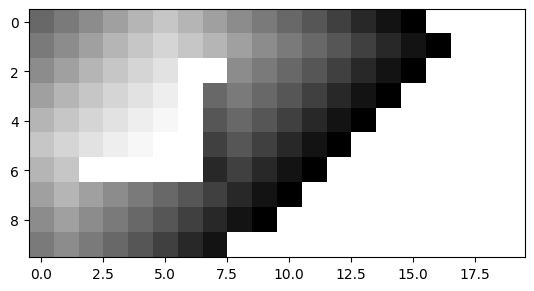

In [54]:
astar(start, final, lambda a, b: 0)